In [1]:
import numpy as np 
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt                               
import os 
import matplotlib.colors as mcolors
from matplotlib.ticker import MultipleLocator
import matplotlib.ticker as ticker
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.gridspec as gridspec
matplotlib.rcParams["figure.dpi"] = 150
from particle import PDGID
import sys
sys.path.append("/home/dabadjiev/smartpixels_ml_dsabadjiev/Muon_Collider_Smart_Pixels/daniel/validationPlots/")
from plotUtils import *
import pickle

from SpixPlotter import SmartpixPlotter
import argparse
from pathlib import Path
# from runPlots2 import main

In [2]:
datasetDir = Path('/home/dabadjiev/smartpixels_ml_dsabadjiev/Muon_Collider_Smart_Pixels/Data_Files/Data_Set_20260118_160302_flp0')
datasetDir = Path('/home/dabadjiev/smartpixels_ml_dsabadjiev/Muon_Collider_Smart_Pixels/Data_Files/Data_Set_20260119_151558')
parquetDir_all = datasetDir.joinpath("Parquet_Files")
trackDirBib_mm = datasetDir.joinpath("Track_Lists")
trackDirBib_mp = datasetDir.joinpath("Track_Lists")
trackDirSig = datasetDir.joinpath("Track_Lists")
PLOT_DIR = datasetDir.joinpath("plots")


loading data, Currently loading settings: 
processRecon: True
savedPklFromParquet: False
interactivePlots: True
done with the for loop, now concatenating the dataframes
len truthSig: 9069
len truthBib: 9375
len truthBib_mm: 4697
len truthBib_mp: 4678
fraction of total that are MM: 0.25466276295814355
fraction of total that are MP: 0.2536326176534374
fraction of total that are Bib: 0.508295380611581
fraction of total that are Sig: 0.491704619388419
len truthSig: 9069
len truthBib: 9375
len truthBib_mm: 4697
len truthBib_mp: 4678
fraction of total that are MM: 0.25466276295814355
fraction of total that are MP: 0.2536326176534374
fraction of total that are Bib: 0.508295380611581
fraction of total that are Sig: 0.491704619388419


/home/dabadjiev/smartpixels_ml_dsabadjiev/Muon_Collider_Smart_Pixels/daniel/validationPlots/plotUtils.py:253: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  truthSig["xSize"] = list(xSizesSig)
/home/dabadjiev/smartpixels_ml_dsabadjiev/Muon_Collider_Smart_Pixels/daniel/validationPlots/plotUtils.py:254: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  truthSig["ySize"] = list(ySizesSig)
/home/dabadjiev/smartpixels_ml_dsabadjiev/Muon_Collider_Smart_Pixels/daniel/validationPlots/plotUtils.py:255: SettingWithCopyWar

getting average cluster profile in each regime
finished getting average cluster profile in each regime
Finished loading parquet data [not counting tracks], now proceeding to plotting or tracklists
Start loading track data
Nan m count: 0
Nan m count: 0
finished loading track data
Plotting settings:
interactivePlots: True
plotTracklists: True
plotParquets: True

Plotting directory: /home/dabadjiev/smartpixels_ml_dsabadjiev/Muon_Collider_Smart_Pixels/Data_Files/Data_Set_20260119_151558/plots
Setting the histogram bins to be the collective range for the input arrs
p max is 0.56978 and min is 1e-05
pT max is 0.45853 and min is 1e-05
So bins go from 1e-05 to 0.56978, and there are 30 bins with linear spacing
Setting the histogram bins to be the collective range for the input arrs
p max is 99.99619 and min is 1.01714
pT max is 99.92859 and min is 0.47834
So bins go from 0.47834 to 99.99619, and there are 30 bins with linear spacing


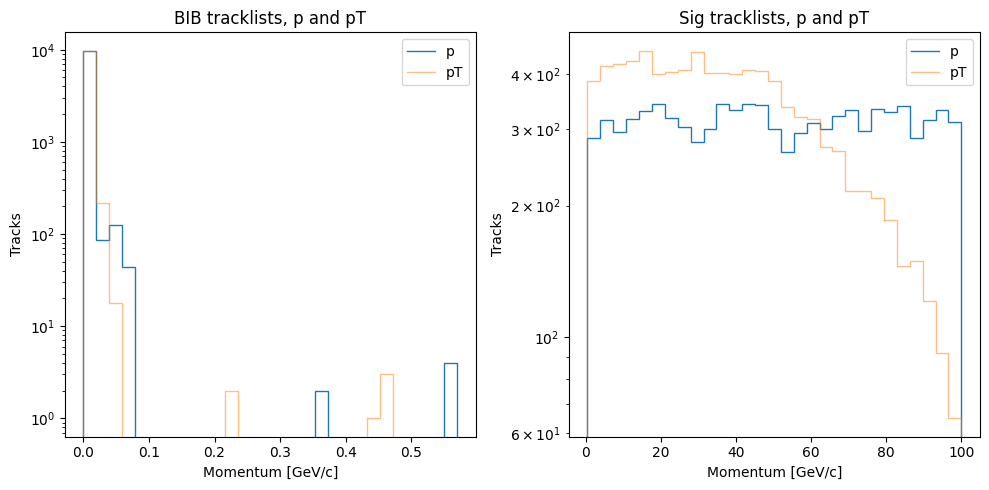

Plot saved as: /home/dabadjiev/smartpixels_ml_dsabadjiev/Muon_Collider_Smart_Pixels/Data_Files/Data_Set_20260119_151558/plots/TrackPPt.png
Setting the histogram bins to be the collective range for the input arrs
pt from parquet  max is 0.45853 and min is 4e-05
pt from track  max is 0.45853 and min is 1e-05
So bins go from 1e-05 to 0.45853, and there are 30 bins with linear spacing
Setting the histogram bins to be the collective range for the input arrs
pt from parquet  max is 99.928589 and min is 0.47834
pt from track  max is 99.92859 and min is 0.47834
So bins go from 0.47834 to 99.92859, and there are 30 bins with linear spacing


KeyboardInterrupt: 

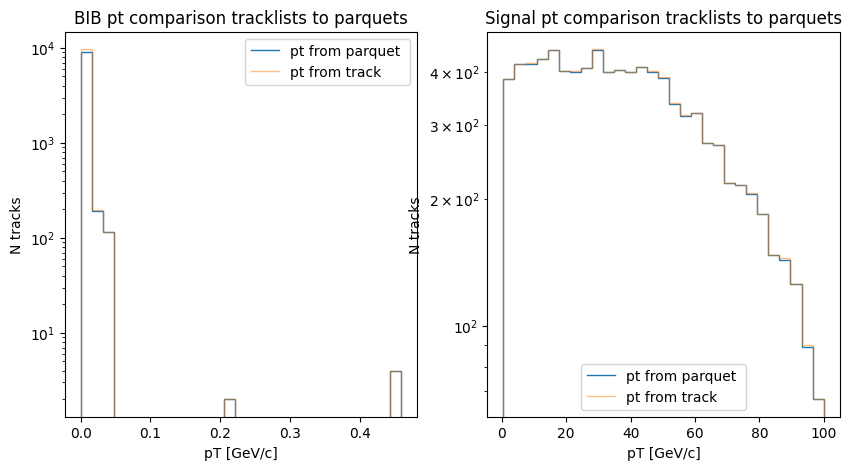

In [15]:
plotter = SmartpixPlotter(
                    #  parquetDir_mm = parquetDir_mm , #Not yet implemented
                    #  parquetDir_mp = parquetDir_mp ,
                    #  parquetDir_sig = parquetDir_sig ,
                    parquetDir_all = parquetDir_all ,
                    skip_indices = list(range(1730 - 124+87, 1769)),
                    trackDirBib_mm = trackDirBib_mm,
                    trackDirBib_mp = trackDirBib_mp,
                    trackDirSig = trackDirSig,
                    processRecon = True,
                    interactivePlots=True,
                    PLOT_DIR = PLOT_DIR,# os.path.join(os.path.dirname(os.path.abspath(__file__)), "plots"),
                    savedPklFromParquet = False,
                    processTracks = True,
                    processOldTracks = False,
                    plotTracklists = True,
                    plotParquets = True,
                    styleSheet = 'default',
                    )
plotter.runPlots()

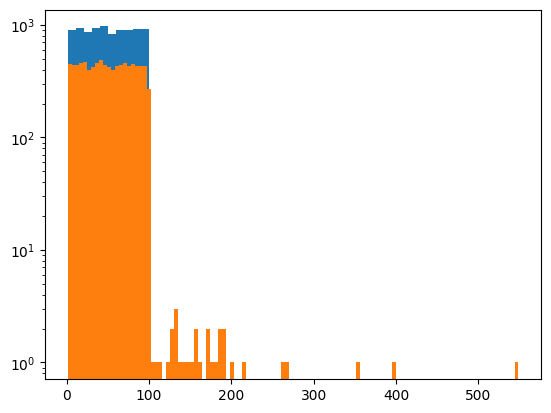

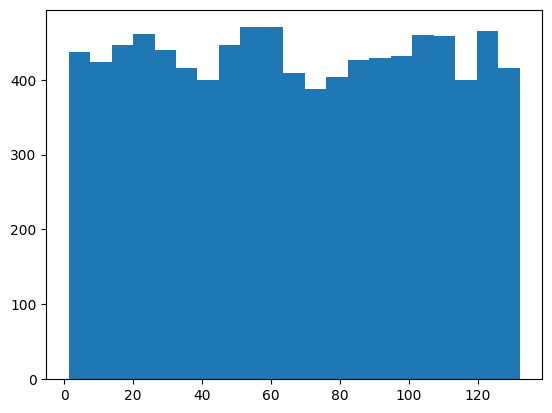

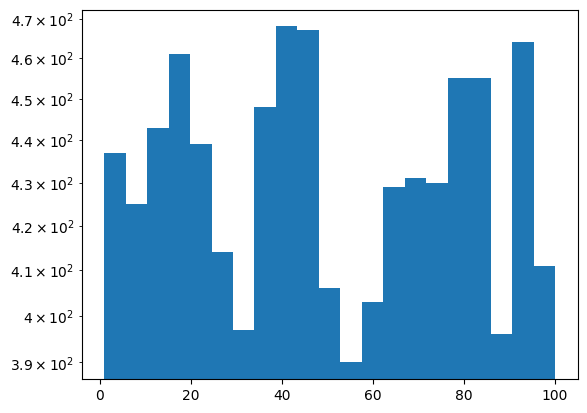

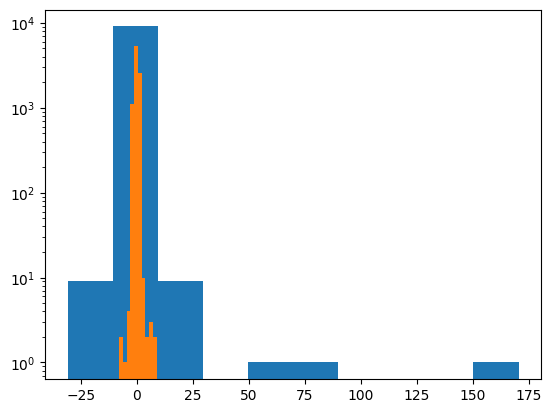

In [4]:
tracksDF = plotter.tracksSig
plt.hist(tracksDF["p"])
x = tracksDF['x']
y = tracksDF['y']
z = tracksDF['z']

p = tracksDF["pt"] / np.sqrt((z**2 +y**2)/(x**2 +y**2 +z**2 ))
plt.hist(p,bins='auto')
plt.yscale('log')
plt.show()
pcalc2 = np.sqrt(tracksDF['n_x']*tracksDF['n_x'] + tracksDF['n_y']*tracksDF['n_y'] +tracksDF['n_z']*tracksDF['n_z'])
plt.hist(pcalc2,bins='auto')
plt.show()
plt.hist(plotter.truthSig['p_calc1'],bins='auto')
# plt.hist(plotter.truthSig['p_calc2'])
# plt.hist(plotter.truthSig['p_calc3'],alpha=0.5)
plt.yscale('log')
plt.show()
plt.hist(tracksDF['cota'])
plt.hist(plotter.truthSig['cotAlpha'])
plt.yscale('log')


In [5]:
max = 100

print(np.where(p>max))
print(np.where(tracksDF['p']>max))
print(tracksDF.iloc[np.where(p>max)])
# cota = 68.29143
# cotb = 0.37192
cota = 0.27313
cotb = 0.23144
flp = 0
z = 1./np.sqrt((1.+cotb*cotb+cota*cota)) #locdir[2] https://github.com/elizahoward/pixelav/blob/30d7585448f87bcdf10f7f066005a04e4bd34a52/ppixelav2_list_trkpy_n_2f_custom.c#L341
flipCoefficient = ((np.array(flp) == 0)*2-1)*-1
z=flipCoefficient*z
x = z*cota #locdir[0]
y = z*cotb #locdir[1]
qq = x**2 +y**2 +z**2 

print(94.9*(z**2+y**2)/( x**2 +y**2 +z**2))

# print(qq.iloc[5713])

(array([ 127,  128,  130,  420,  421,  639,  640,  738, 1213, 1214, 1215,
       1216, 1217, 2210, 2492, 2493, 2494, 2495, 2496, 2706, 2732, 3846,
       3954, 5009, 6598, 7424, 8411, 8412, 8471, 8661, 8662, 8663, 8681,
       8682, 8809, 8857]),)
(array([], dtype=int64),)
          cota      cotb         p  flp  ylocal  zglobal        pt        t  \
127    2.03863   0.31709  94.92730    0   6.975   -8.375  91.73514  0.10707   
128   -3.12860  -0.59077  94.92730    0   7.750  -13.100  91.73514  0.12502   
130   -0.46660   0.13471  94.92730    0   7.700  -10.925  91.73514  0.15466   
420    1.10910  -0.05749  76.48448    0  -2.225   -3.375  76.28678  0.10153   
421   -1.45677   0.05131  76.48448    0  -0.875   -5.125  76.28678  0.11102   
139  -11.10875   2.83572  79.72095    0   6.200  -41.750  50.13166  0.17236   
140    7.15371  -1.68998  79.72095    0   6.725  -42.800  50.13166  0.17722   
238   10.76013  -2.52396  95.94553    0   0.575   17.700  86.89019  0.15690   
213   -1.52951 

     x-entry    y-entry  z-entry        n_x        n_y         n_z  \
0 -25.042547   9.805734     50.0  51.934078  -4.204331  -37.636120   
1 -54.396389  10.472327     50.0  10.703053   0.617136   -7.696881   
2  58.606556  -2.659614     50.0 -71.506088   1.360070  -37.927219   
3 -34.038651   7.704502     50.0  13.823456 -13.094212 -123.810623   
4  47.669693  -3.532532     50.0 -73.326401  -9.580225  -89.921394   

   number_eh_pairs  y-local   z-global         pt  ...  scalePion    p_calc1  \
0          18172.0   -3.400  40.824999  28.680220  ...   1.320435  48.677291   
1           5495.0    2.325  40.024999   5.847890  ...   1.320435   9.994931   
2           8216.0    1.075 -58.000002  28.741711  ...   1.320435  61.308080   
3           5401.0   -3.200   4.075000  94.287910  ...   1.320435  94.867347   
4           5727.0   -3.225 -22.125000  68.485336  ...   1.320435  88.170446   

     p_calc2    p_calc3   betaGamma  pathLength  EHperMicron  xSize  ySize  \
0  48.677480  48.677

(array([   0.,    0.,    0.,    0.,    0., 9375.,    0.,    0.,    0.,
           0.]),
 array([10.5, 10.6, 10.7, 10.8, 10.9, 11. , 11.1, 11.2, 11.3, 11.4, 11.5]),
 <BarContainer object of 10 artists>)

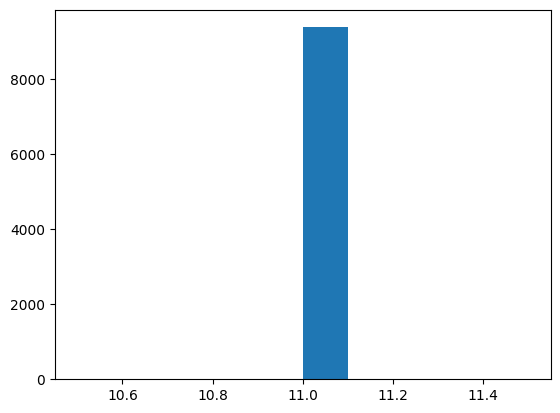

In [6]:
print(plotter.truthSig.head())
print(plotter.truthBib.head())
print(plotter.truthBib.keys())
print(plotter.truthSig.keys())
plt.hist(plotter.truthBib["PID"])
# plotter.truthSig['flp']

0.5
0.8
1.0
0.9315175080076958


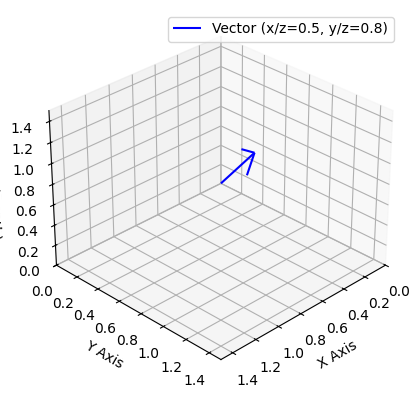

2.03863
0.31709
1.0
0.4575656022290849


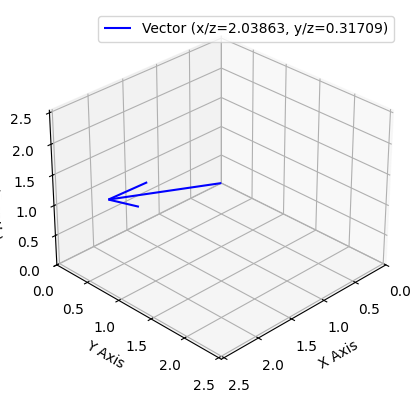

In [7]:
import matplotlib.pyplot as plt
import numpy as np

def plot_vector_from_cotangents(xz_ratio, yz_ratio):
    """
    Plots a 3D vector given cotangent ratios x/z and y/z.
    
    Args:
        xz_ratio (float): The ratio x/z.
        yz_ratio (float): The ratio y/z.
    """
    # Assume z = 1 to resolve the vector components
    z = 1.0
    x = xz_ratio * z
    y = yz_ratio * z
    print(x)
    print(y)
    print(z)
    print(np.sqrt(z**2+y**2)/np.sqrt(x**2+y**2+z**2))

    # Initialize the 3D plot
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Plot the vector using quiver(starting_point, vector_components)
    # Origin (0,0,0) as starting point
    ax.quiver(0, 0, 0, x, y, z, color='blue', label=f'Vector (x/z={xz_ratio}, y/z={yz_ratio})')
    ax.view_init(elev=30, azim=45)

    # Setting plot limits and labels
    limit = np.max([np.abs(x), np.abs(y), np.abs(z)]) + 0.5
    ax.set_xlim([0, limit])
    ax.set_ylim([0, limit])
    ax.set_zlim([0, limit])
    
    ax.set_xlabel('X Axis')
    ax.set_ylabel('Y Axis')
    ax.set_zlabel('Z Axis (Depth)')
    ax.legend()
    
    plt.show()


# Example usage:
plot_vector_from_cotangents(0.5, 0.8)
plot_vector_from_cotangents( 2.03863 ,  0.31709 )

In [2]:
truthBib = pd.read_pickle('/home/dabadjiev/smartpixels_ml_dsabadjiev/smartpixML/2026Datasets/Data_Files/Data_Set_20260129_200531/plots/dfOfTruthBib.pkl')
truthSig = pd.read_pickle('/home/dabadjiev/smartpixels_ml_dsabadjiev/smartpixML/2026Datasets/Data_Files/Data_Set_20260129_200531/plots/dfOfTruthSig.pkl')

Setting the histogram bins to be the collective range for BIB and Signal of p_calc1
BIB    p_calc1 max is 3.7617497381204092 and min is 6.999806418481216e-05
Signal p_calc1 max is 99.99973460132152 and min is 0.0764498870432457
So bins go from 6.999806418481216e-05 to 99.99973460132152, and there are 30 bins with linear spacing
Setting the histogram bins to be the collective range for BIB and Signal of p_calc2
BIB    p_calc2 max is 3.761730677469525 and min is 6.0553865732732337e-05
Signal p_calc2 max is 99.99987872795946 and min is 0.07644116737456169
So bins go from 6.0553865732732337e-05 to 99.99987872795946, and there are 30 bins with linear spacing
Setting the histogram bins to be the collective range for BIB and Signal of p_calc3
BIB    p_calc3 max is 3.761730677469525 and min is 6.055386573273234e-05
Signal p_calc3 max is 99.99987872795946 and min is 0.07644116737456169
So bins go from 6.055386573273234e-05 to 99.99987872795946, and there are 30 bins with linear spacing
Setting 

<Axes: >

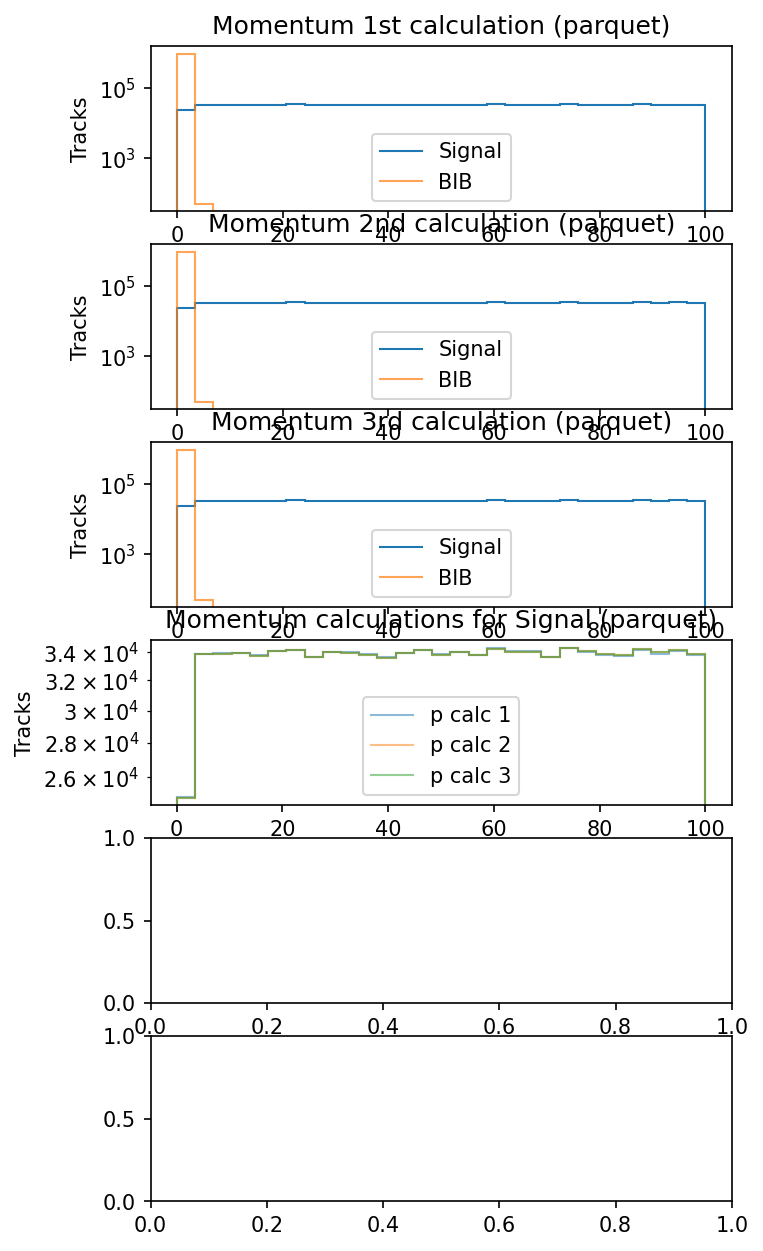

In [3]:
plt.figure(figsize=(5,10))
plt.subplot(611)
plotHistoBibSig(truthBib,truthSig,key="p_calc1",pltStandalone=False,title="Momentum 1st calculation (parquet)",xlabel="p_calc1 (GeV)",yscale='log')
plt.subplot(612)
plotHistoBibSig(truthBib,truthSig,key="p_calc2",pltStandalone=False,title="Momentum 2nd calculation (parquet)",xlabel="p_calc2 (GeV)",yscale='log')    
plt.subplot(613)
plotHistoBibSig(truthBib,truthSig,key="p_calc3",pltStandalone=False,title="Momentum 3rd calculation (parquet)",xlabel="p_calc3 (GeV)",yscale='log')
plt.subplot(614)
plotManyHisto([truthSig["p_calc1"],truthSig["p_calc2"],truthSig["p_calc3"]],pltStandalone=False,pltLabels=["p calc 1","p calc 2","p calc 3"]
                ,title="Momentum calculations for Signal (parquet)",xlabel="Momentum (GeV)",yscale='log',alphas=[0.5,0.5,0.5])
# # plt.hist(truthSig["p_calc1"],label="p calc 1",alpha=0.5)
# # plt.hist(truthSig["p_calc2"],label="p calc 2",alpha=0.5)
# # plt.legend()
# # plt.yscale('log')
# # plt.xlim([0,100])
plt.subplot(615)
# plotHisto(truthSig["p_calc1"]-truthSig["p_calc2"],bins='auto',pltStandalone=False,xlabel="difference in momentum (GeV)",title="Difference between Signal p calc 1 and 2 calculations",showNums=False)
# plt.yscale('log')
plt.subplot(616)
# plotHisto(truthSig["p_calc1"]-truthSig["p_calc3"],bins='auto',pltStandalone=False,xlabel="difference in momentum (GeV)",title="Difference between Signal p calc 1 and 3 calculations",showNums=False)
# plt.yscale('log')

len(qq[np.abs(qq)>1]): 0, len(qq): 956024,  len(qq[np.abs(qq)>1])/len(qq): 0.0


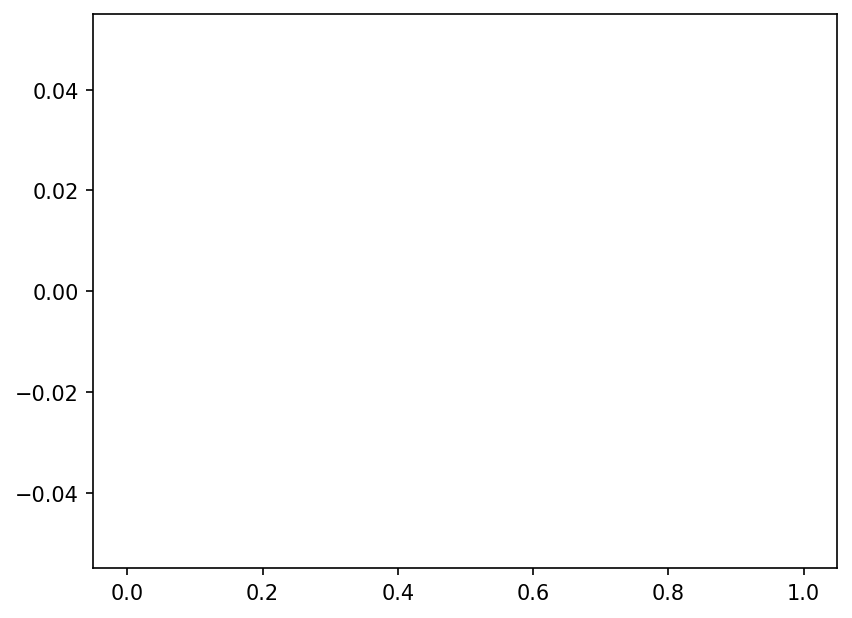

In [10]:
# qq = truthSig["p_calc1"]-truthSig["p_calc3"]
qq = truthBib["p_calc1"]-truthBib["p_calc2"]
qq[np.abs(qq)>0.1]
plt.hist(qq[np.abs(qq)>0.1])
print(f"len(qq[np.abs(qq)>1]): {len(qq[np.abs(qq)>1])}, len(qq): {len(qq)},  len(qq[np.abs(qq)>1])/len(qq): {len(qq[np.abs(qq)>1])/len(qq)}")

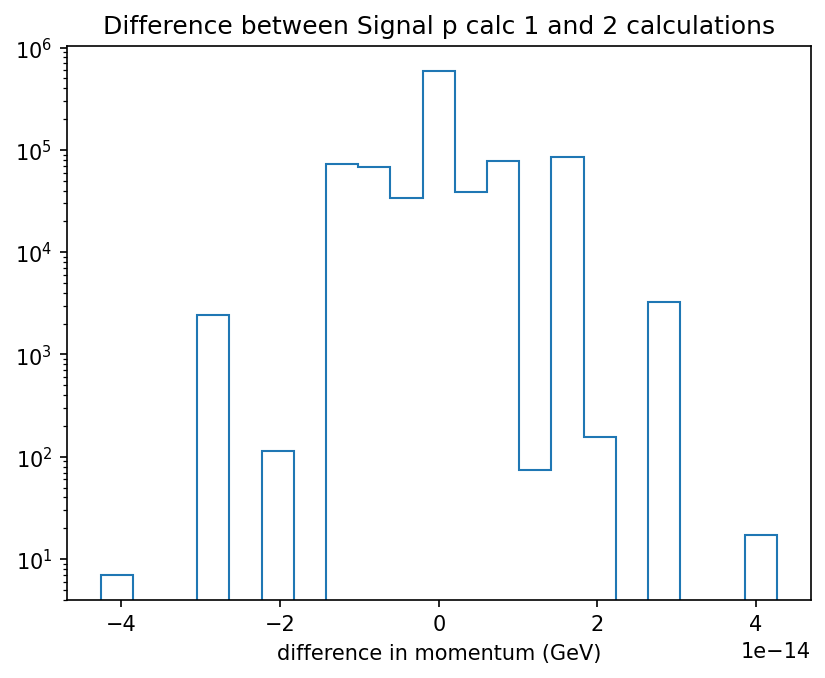

In [9]:
plotHisto(truthSig["p_calc3"]-truthSig["p_calc2"],bins='auto',pltStandalone=False,xlabel="difference in momentum (GeV)",title="Difference between Signal p calc 1 and 2 calculations",showNums=False)
plt.yscale('log')

### old

In [8]:
truthSig = pd.read_pickle("dfOfTruthSig.pkl")
truthBib = pd.read_pickle("dfOfTruthBib.pkl")
xSizesBib=truthBib["xSize"]
ySizesBib=truthBib["ySize"]
nPixelsBib=truthBib["nPix"]
xSizesSig=truthSig["xSize"]
ySizesSig=truthSig["ySize"]
nPixelsSig=truthSig["nPix"]
with open("avgProfBib.pkl",'rb') as handle:
    avgClustDictBib = pickle.load(handle)
with open("avgProfSig.pkl",'rb') as handle:
    avgClustDictSig = pickle.load(handle)

In [2]:
bins = 100
# plt.hist(truthSig["p_calc1"]*truthSig["scalePion"], label="momentum from n_x, n_y, n_z",bins=bins)
plt.hist(truthSig["p_calc1"], label="momentum from n_x, n_y, n_z",bins=bins)
# plt.hist(truthSig["p_calc2"], label="momentum from pt, cotAlphaBeta",alpha=0.5,bins=bins)
plt.yscale('log')
plt.legend()
plt.title("signal")
plt.show()
# plt.hist(truthBib["p_calc1"]*truthBib["scalePion"], label="momentum from n_x, n_y, n_z",bins=bins)
# plt.hist(truthBib["p_calc2"], label="momentum from pt, cotAlphaBeta",alpha=0.5,bins=bins)
# plt.yscale('log')
# plt.legend()
# plt.title("bib")
# plt.show()
plt.hist(truthSig["pt"])

# plt.hist(truthSig["p_calc1"]-truthSig["p_calc2"],label="momentum difference",bins=bins)
# plt.yscale('log')
# plt.legend()
# plt.show()
# plt.hist(truthSig["p_calc1"]-truthSig["p_calc2"],label="momentum quotient",bins=bins)
# plt.yscale('log')
# plt.show()

# plt.hist(truthSig["n_x"]*truthSig["n_x"]+truthSig["n_y"]*truthSig["n_y"]+truthSig["n_z"]*truthSig["n_z"],bins=np.linspace(0,1,10
# ))
# plt.yscale('log')
# plt.show()

NameError: name 'truthSig' is not defined

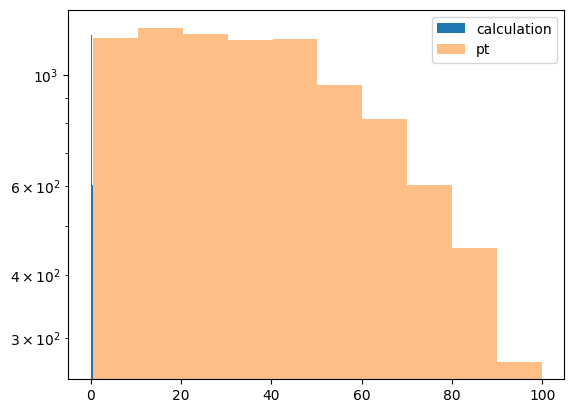

In [10]:
qq = truthSig['pt']*np.sqrt(1+ 1/ (truthSig['cotAlpha']*truthSig['cotAlpha'] + truthSig['cotBeta']*truthSig['cotBeta']) )
qq =  (truthSig['cotAlpha']*truthSig['cotAlpha'] + truthSig['cotBeta']*truthSig['cotBeta'])
qq2 = (truthSig['n_x']*truthSig['n_x']+truthSig['n_y']*truthSig['n_y']) / (truthSig['n_z']*truthSig['n_z'])
qq3 = (truthSig['n_z']*truthSig['n_z']+truthSig['n_y']*truthSig['n_y']) / (truthSig['n_x']*truthSig['n_x']+truthSig['n_y']*truthSig['n_y'] + truthSig['n_z']*truthSig['n_z'])
p = truthSig['pt'] / np.sqrt(qq3)

qq4 = (truthSig['n_z']*truthSig['n_z']+truthSig['n_y']*truthSig['n_y']) / (truthSig['scalePion']*truthSig['scalePion'])
p2 = np.sqrt(qq4) / 200
plt.hist(p2,label="calculation")
plt.yscale('log')
# plt.show()
plt.hist(truthSig['pt'],alpha=0.5,label="pt")
plt.legend()
plt.yscale('log')
plt.show()

(array([3.634e+03, 3.579e+03, 1.837e+03, 1.000e+01, 5.000e+00, 1.000e+00,
        2.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([  1.01776303,  40.46109304,  79.90442306, 119.34775307,
        158.79108308, 198.23441309, 237.6777431 , 277.12107311,
        316.56440313, 356.00773314, 395.45106315]),
 <BarContainer object of 10 artists>)

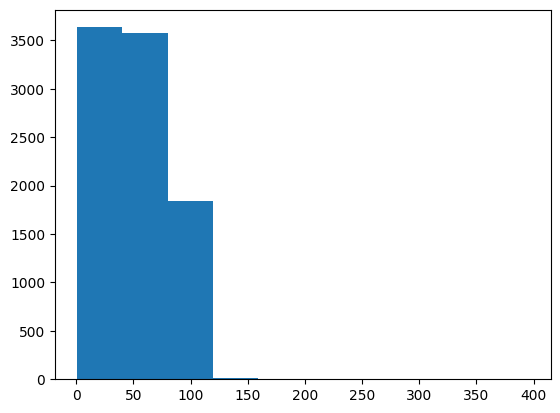

In [11]:
truthSig = truthSig.query("PID == 13 or PID == -13")
z = 1./np.sqrt((1.+truthSig["cotBeta"]*truthSig["cotBeta"]+truthSig["cotAlpha"]*truthSig["cotAlpha"]))
x = z*truthSig["cotAlpha"]
y = z*truthSig["cotBeta"]
qq = x**2 +y**2 +z**2 

p = truthSig["pt"] / np.sqrt((z**2 +y**2)/(x**2 +y**2 +z**2 ))


# qq2 = (truthSig['n_x']*truthSig['n_x']+truthSig['n_y']*truthSig['n_y'] + truthSig['n_z']*truthSig['n_z'])
plt.hist(p)

In [12]:
avgClustDictSig["yProfileLowPtPosLowYl"]

array([1.86051103e+00, 1.45063879e+00, 2.02311266e+00, 4.82229965e+00,
       1.44204413e+01, 6.88759233e+02, 5.16251948e+03, 6.70331220e+02,
       1.29756098e+01, 6.26364692e+00, 2.38606272e+00, 2.67758420e+00,
       7.60394890e-01])

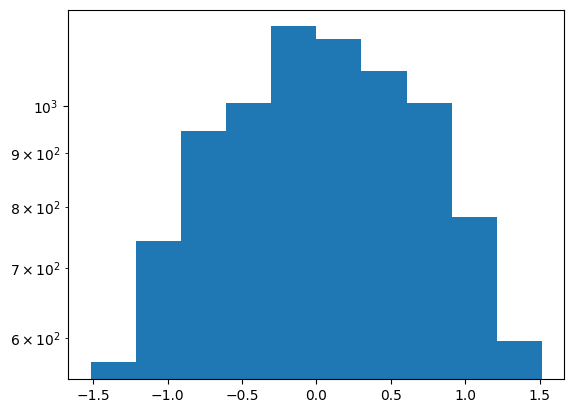

In [13]:
plt.hist(truthSig["eta"])
plt.yscale('log')

In [14]:
print(np.log(2.7))

0.9932517730102834


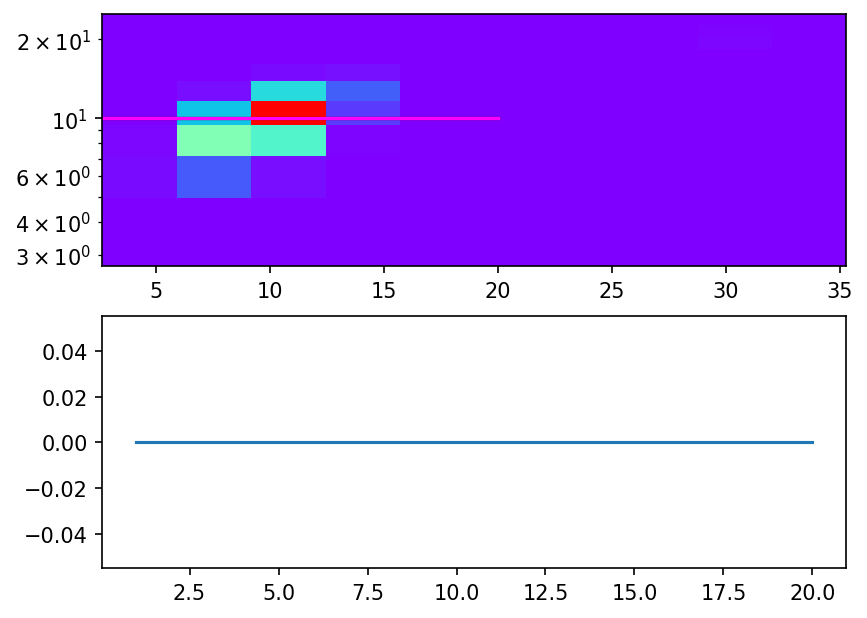

In [40]:
plt.figure()
# plt.subplot(211)
# plt.plot(np.linspace(1,20,20),np.zeros((20,)))
plt.subplot(211)
from numpy.random import multivariate_normal

import matplotlib.colors as mcolors

# Fixing random state for reproducibility.
np.random.seed(19680801)

data = np.vstack([
    multivariate_normal([10, 10], [[3, 2], [2, 3]], size=100000),
    multivariate_normal([30, 20], [[3, 1], [1, 3]], size=1000)
])

gammas = [0.8, 0.5, 0.3]
plt.hist2d(data[:,0],data[:,1],cmap='rainbow')
# plt.plot(np.linspace(1,20,20),np.ones((20,)),color='b')
# plt.plot(np.linspace(1,20,20),4*np.ones((20,)),color='r')
# plt.plot(np.linspace(1,20,20),5*np.ones((20,)),color='g')
# plt.plot(np.linspace(1,20,20),10*np.ones((20,)))
plt.yscale('log')
plt.subplot(212)
plt.plot(np.linspace(1,20,20),np.zeros((20,)))
plt.subplot(211)
plt.subplot(211)
plt.subplot(211)
plt.plot(np.linspace(1,20,20),10*np.ones((20,)),color='k')
ax = plt.gca()
ax.plot(np.linspace(1,20,20),10*np.ones((20,)),color='red')
fig = plt.gcf()
plt.gcf().axes[0].plot(np.linspace(1,20,20),10*np.ones((20,)),color='magenta')
# plt.subplot(212)
# plt.plot(np.linspace(1,20,20),np.ones((20,)))